In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

## Read Foreground Image

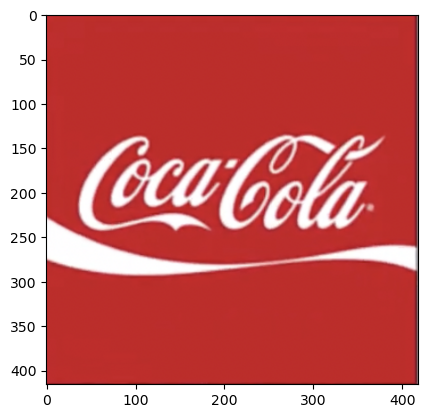

In [9]:
pt = '/Users/gouher/Documents/personal/codes/computer_vision/image_processing_concepts/data/color/logo.png'
img1 = cv2.imread(pt,cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)

In [10]:
img1.shape

(416, 418, 3)

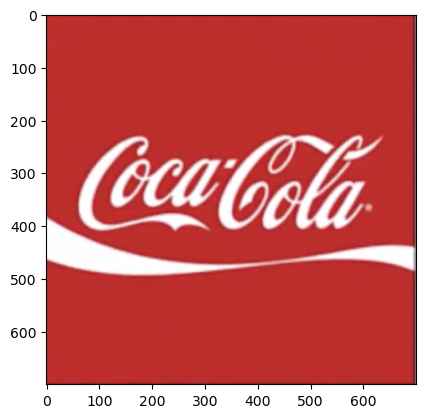

In [11]:
img1 = cv2.resize(img1,dsize=(700,700),interpolation=cv2.INTER_AREA)
plt.imshow(img1)

In [12]:
img1.shape

(700, 700, 3)

## Read Background Image

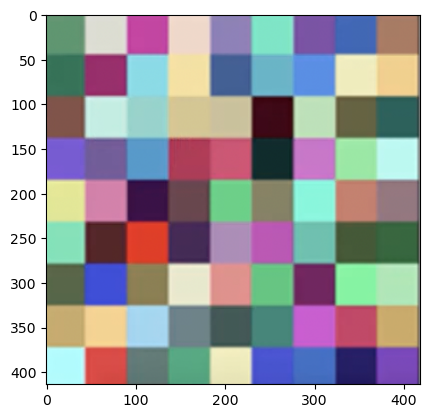

In [13]:
pt = '/Users/gouher/Documents/personal/codes/computer_vision/image_processing_concepts/data/color/checkerboard.png'
img2 = cv2.imread(pt,cv2.IMREAD_COLOR)
plt.imshow(img2)

In [14]:
img2.shape

(414, 418, 3)

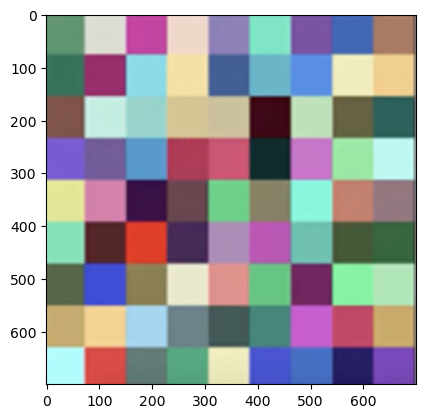

In [15]:
img2 = cv2.resize(img2,dsize=(700,700),interpolation=cv2.INTER_AREA)
plt.imshow(img2)

## Create Mask for Original Image

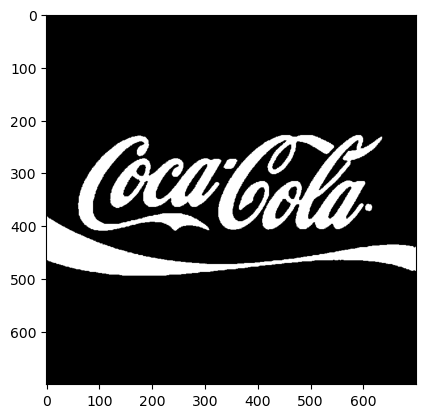

In [31]:
img1_gray = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
retval, img1_mask = cv2.threshold(img1_gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
plt.imshow(img1_mask,cmap='gray')

## Invert the Mask

In [32]:
img1_mask_inv = cv2.bitwise_not(img1_mask)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)